In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataloader import DHCDataset
from PIL import Image

dataManager = DHCDataset('./dataset/dataset.npz')

In [2]:
train = dataManager.image_train
train_label = dataManager.label_train
test = dataManager.image_test
test_label = dataManager.label_test

In [3]:
#NOTE: THIS CODE BLOCK SHOULD RUN ONLY ONCE THE ENTIRE RUNTIME OF THE CODE
#basically what it does it decrease the labels by 1, so the image labeling starts from 0
for i in range(train_label.size):
    train_label[i] -= 1
for i in range(test_label.size):
    test_label[i] -= 1

In [4]:
#normalization of data
train = train.reshape(78200, 1024)
m, n = train.shape
train = train.T
train = train/255.
test = test.reshape(13800, 1024)
test = test.T
test = test/255.

In [5]:
#time to design the model
def init_params():
    w1 = np.random.rand(46, 1024) - 0.5
    b1 = np.random.rand(46, 1) - 0.5
    w2 = np.random.rand(46, 46) - 0.5
    b2 = np.random.rand(46, 1) - 0.5
    return w1, b1, w2, b2

def relu(z):
    return np.maximum(0, z)

def diff_relu(z):
    return z > 0

def softmax(z):
    val = np.exp(z)/ sum(np.exp(z))
    return val

def encode(y):
    hot_y = np.zeros((y.size, y.max()+1))
    hot_y[np.arange(y.size), y] = 1
    hot_y = hot_y.T
    return hot_y

def forward(w1, b1, w2, b2, data):
    z1 = w1.dot(data) + b1
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def backward(w2, z1, a1, a2, train_data, train_label):
    label = encode(train_label)
    dz2 = a2 - label
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2)*diff_relu(z1)
    dw1 = 1/m * dz1.dot(train_data.T)
    db1 = 1/m * np.sum(dz1)
    return dw1, db1, dw2, db2

def update(w1, b1, w2, b2, dw1, dw2, db1, db2, RATE):
    w1 = w1 - RATE*dw1
    w2 = w2 - RATE*dw2
    b1 = b1 - RATE*db1
    b2 = b2 - RATE*db2
    return w1, b1, w2, b2

In [6]:
def predicted_output(a2):
    return np.argmax(a2, 0)

def accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y)/y.size

def gradient_descent(train_data, train_label, RATE, iterations):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward(w1, b1, w2, b2, train_data)
        dw1, db1, dw2, db2 = backward(w2, z1, a1, a2, train_data, train_label)
        w1, b1, w2, b2 = update(w1, b1, w2, b2, dw1, dw2, db1, db2, RATE)
        if(i % 10 == 0):
            predicted = predicted_output(a2)
            print("Accuracy = ", accuracy(predicted, train_label))
    return w1, b1, w2, b2

In [7]:
w1, b1, w2, b2 = gradient_descent(train, train_label, 1, 10000)

[16 34  3 ... 34 16 16] [38 38 38 ... 28 28 28]
Accuracy =  0.03248081841432225
[28 28 11 ... 33 18 28] [38 38 38 ... 28 28 28]
Accuracy =  0.05845268542199489
[40 28 41 ... 33 18 28] [38 38 38 ... 28 28 28]
Accuracy =  0.10760869565217392
[41 41 38 ... 14 14 37] [38 38 38 ... 28 28 28]
Accuracy =  0.1463682864450128
[39 41 38 ... 14 12 18] [38 38 38 ... 28 28 28]
Accuracy =  0.19959079283887468
[39 41 38 ... 45 45 37] [38 38 38 ... 28 28 28]
Accuracy =  0.2657161125319693
[38 41 38 ... 45 45 37] [38 38 38 ... 28 28 28]
Accuracy =  0.28296675191815857
[39 41 38 ... 45 45  3] [38 38 38 ... 28 28 28]
Accuracy =  0.30921994884910486
[39 41 38 ... 45 36  3] [38 38 38 ... 28 28 28]
Accuracy =  0.33517902813299233
[39 41 38 ... 45 36  3] [38 38 38 ... 28 28 28]
Accuracy =  0.3646419437340154
[39 41 38 ... 45 36  3] [38 38 38 ... 28 28 28]
Accuracy =  0.37941176470588234
[38 41 38 ... 40 36 18] [38 38 38 ... 28 28 28]
Accuracy =  0.29107416879795395
[39 41 38 ... 45 43  3] [38 38 38 ... 28 28

In [8]:
def inNepali(val):
    words = ['क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 
             'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', 'क्ष', 'त्र', 'ज्ञ', '०', '१', '२', '३', '४', '५', '६', '७', '८', '९']
    print(words[int(val)])

In [9]:
def trial(index):
    _, _, _, a2 = forward(w1, b1, w2, b2, train[:, index])
    value = np.argmax(a2, 0)
    print("Predicted value:")
    inNepali(value)
    print("Actual value:")
    inNepali(train_label[index])

    #draw the image
    image = train[:, index].reshape((32, 32))*255
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.show()

In [10]:
def test_result():
    _, _, _, a2 = forward(w1, b1, w2, b2, test)
    samples = np.argmax(a2, 0)
    accuracy = np.sum(samples == test_label)/test_label.size
    print(accuracy)

test_result()

0.8523188405797102


In [11]:
# know the individual image's prediction
def trial(index):
    current_image = train[:, index, None]
    _, _, _, A2 = forward(w1, b1, w2, b2, current_image)
    prediction = np.argmax(A2, 0).item()
    print("Predicted value:")
    inNepali(prediction)
    print("Actual value:")
    inNepali(train_label[index])

    plt.gray()
    plt.imshow(train[:,index].reshape(32,32)*255, interpolation='nearest')
    plt.show()

Predicted value:
क्ष
Actual value:
क्ष


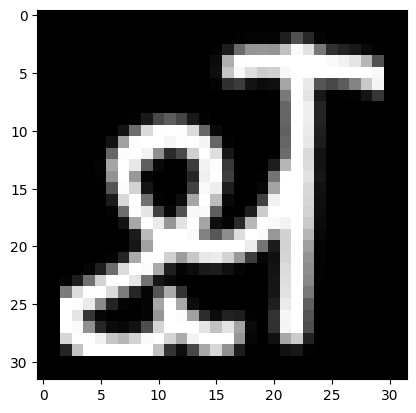

Predicted value:
४
Actual value:
४


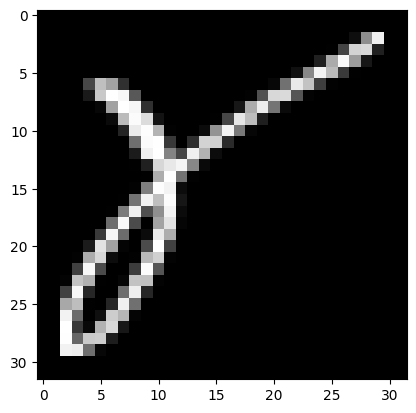

Predicted value:
०
Actual value:
०


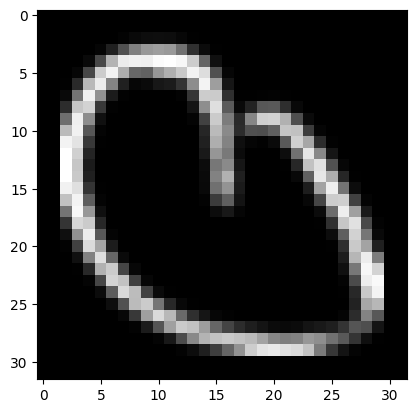

In [12]:
trial(2434)
trial(17834)
trial(29991)